<a href="https://colab.research.google.com/github/FayAljumah/Multi-Layer-Perceptron-on-MNIST-Dataset/blob/main/Multi-Layer%20Perceptron%20(MLP)%20on%20MNIST%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
print(torch.__version__)

2.5.1+cu121


In [ ]:
# Loading MNIST
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True) #60,000
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True) #10,000

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# MLP Model initialization
class MLP(nn.Module):
    def __init__(self, input_size=784, hidden_size1=400, hidden_size2=400, output_size=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        if hidden_size2 is not None:
            self.fc2 = nn.Linear(hidden_size1, hidden_size2)
            self.fc3 = nn.Linear(hidden_size2, output_size)
        else:
            self.fc2 = None
            self.fc3 = nn.Linear(hidden_size1, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)  # Reshape input to (Batch_Size, 784)
        x = self.relu(self.fc1(x))
        if self.fc2 is not None:
            x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Model Training
def train_model(model, optimizer, criterion, train_loader, test_loader, epochs=20):
    train_acc_list, test_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and weight update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = correct / total
        train_acc_list.append(train_acc)

        # Evaluate the model on test data
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = correct / total
        test_acc_list.append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}], Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")

    return train_acc_list, test_acc_list

Epoch [1/20], Training Accuracy: 0.6267, Testing Accuracy: 0.8226
Epoch [2/20], Training Accuracy: 0.8610, Testing Accuracy: 0.8910
Epoch [3/20], Training Accuracy: 0.8939, Testing Accuracy: 0.9059
Epoch [4/20], Training Accuracy: 0.9059, Testing Accuracy: 0.9149
Epoch [5/20], Training Accuracy: 0.9143, Testing Accuracy: 0.9200
Epoch [6/20], Training Accuracy: 0.9208, Testing Accuracy: 0.9284
Epoch [7/20], Training Accuracy: 0.9260, Testing Accuracy: 0.9320
Epoch [8/20], Training Accuracy: 0.9312, Testing Accuracy: 0.9363
Epoch [9/20], Training Accuracy: 0.9358, Testing Accuracy: 0.9382
Epoch [10/20], Training Accuracy: 0.9393, Testing Accuracy: 0.9407
Epoch [11/20], Training Accuracy: 0.9433, Testing Accuracy: 0.9447
Epoch [12/20], Training Accuracy: 0.9460, Testing Accuracy: 0.9486
Epoch [13/20], Training Accuracy: 0.9489, Testing Accuracy: 0.9494
Epoch [14/20], Training Accuracy: 0.9518, Testing Accuracy: 0.9513
Epoch [15/20], Training Accuracy: 0.9539, Testing Accuracy: 0.9543
Epoc

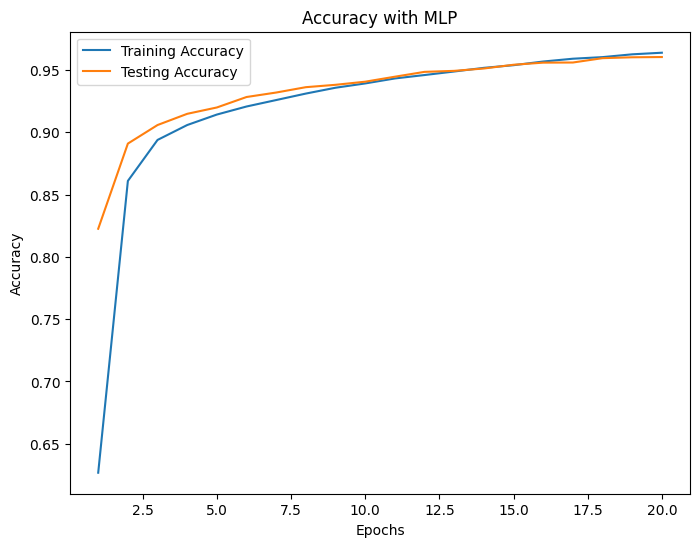

In [ ]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
train_acc_list, test_acc_list = train_model(model, optimizer, criterion, train_loader, test_loader, epochs=20)

# Result Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), train_acc_list, label=f"Training Accuracy")
plt.plot(range(1, 21), test_acc_list, label=f"Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy with MLP')
plt.legend()
plt.show()


Using zeros initialization...
Epoch [1/20], Training Accuracy: 0.1105, Testing Accuracy: 0.1135
Epoch [2/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [3/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [4/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [5/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [6/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [7/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [8/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [9/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [10/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [11/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [12/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [13/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [14/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [15/20], Training Accuracy: 0.1124,

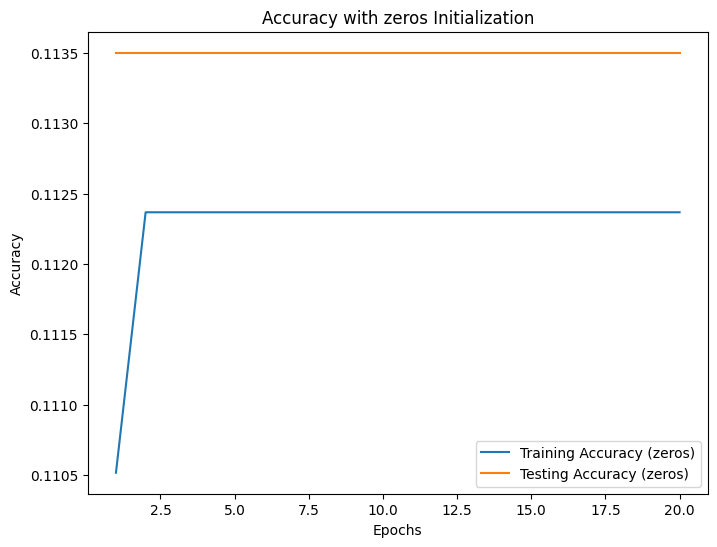

Using uniform initialization...
Epoch [1/20], Training Accuracy: 0.1079, Testing Accuracy: 0.1135
Epoch [2/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [3/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [4/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [5/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [6/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [7/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [8/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [9/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [10/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [11/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [12/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [13/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [14/20], Training Accuracy: 0.1124, Testing Accuracy: 0.1135
Epoch [15/20], Training Accuracy: 0.112

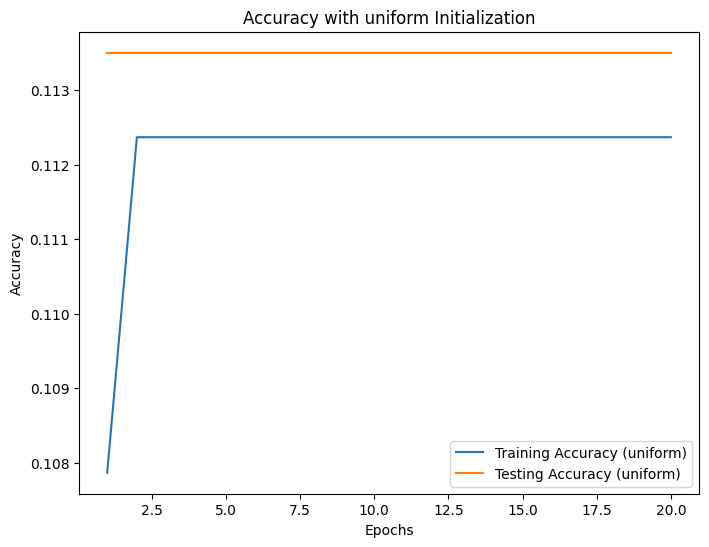

Using normal initialization...
Epoch [1/20], Training Accuracy: 0.8753, Testing Accuracy: 0.9157
Epoch [2/20], Training Accuracy: 0.9325, Testing Accuracy: 0.9254
Epoch [3/20], Training Accuracy: 0.9488, Testing Accuracy: 0.9331
Epoch [4/20], Training Accuracy: 0.9584, Testing Accuracy: 0.9373
Epoch [5/20], Training Accuracy: 0.9670, Testing Accuracy: 0.9386
Epoch [6/20], Training Accuracy: 0.9726, Testing Accuracy: 0.9395
Epoch [7/20], Training Accuracy: 0.9776, Testing Accuracy: 0.9391
Epoch [8/20], Training Accuracy: 0.9820, Testing Accuracy: 0.9409
Epoch [9/20], Training Accuracy: 0.9849, Testing Accuracy: 0.9437
Epoch [10/20], Training Accuracy: 0.9873, Testing Accuracy: 0.9418
Epoch [11/20], Training Accuracy: 0.9889, Testing Accuracy: 0.9432
Epoch [12/20], Training Accuracy: 0.9919, Testing Accuracy: 0.9436
Epoch [13/20], Training Accuracy: 0.9928, Testing Accuracy: 0.9426
Epoch [14/20], Training Accuracy: 0.9940, Testing Accuracy: 0.9439
Epoch [15/20], Training Accuracy: 0.9955

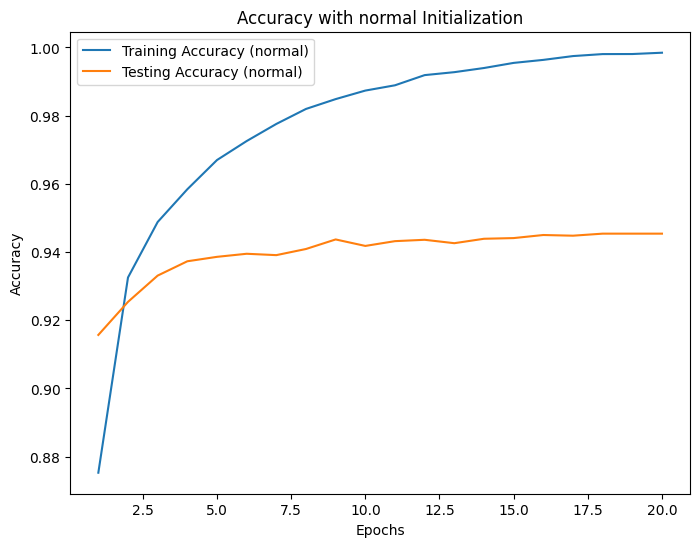

Using xavier initialization...
Epoch [1/20], Training Accuracy: 0.8028, Testing Accuracy: 0.8943
Epoch [2/20], Training Accuracy: 0.9040, Testing Accuracy: 0.9170
Epoch [3/20], Training Accuracy: 0.9193, Testing Accuracy: 0.9255
Epoch [4/20], Training Accuracy: 0.9285, Testing Accuracy: 0.9325
Epoch [5/20], Training Accuracy: 0.9353, Testing Accuracy: 0.9380
Epoch [6/20], Training Accuracy: 0.9404, Testing Accuracy: 0.9430
Epoch [7/20], Training Accuracy: 0.9457, Testing Accuracy: 0.9464
Epoch [8/20], Training Accuracy: 0.9493, Testing Accuracy: 0.9488
Epoch [9/20], Training Accuracy: 0.9528, Testing Accuracy: 0.9537
Epoch [10/20], Training Accuracy: 0.9556, Testing Accuracy: 0.9557
Epoch [11/20], Training Accuracy: 0.9584, Testing Accuracy: 0.9562
Epoch [12/20], Training Accuracy: 0.9607, Testing Accuracy: 0.9594
Epoch [13/20], Training Accuracy: 0.9632, Testing Accuracy: 0.9625
Epoch [14/20], Training Accuracy: 0.9656, Testing Accuracy: 0.9639
Epoch [15/20], Training Accuracy: 0.9675

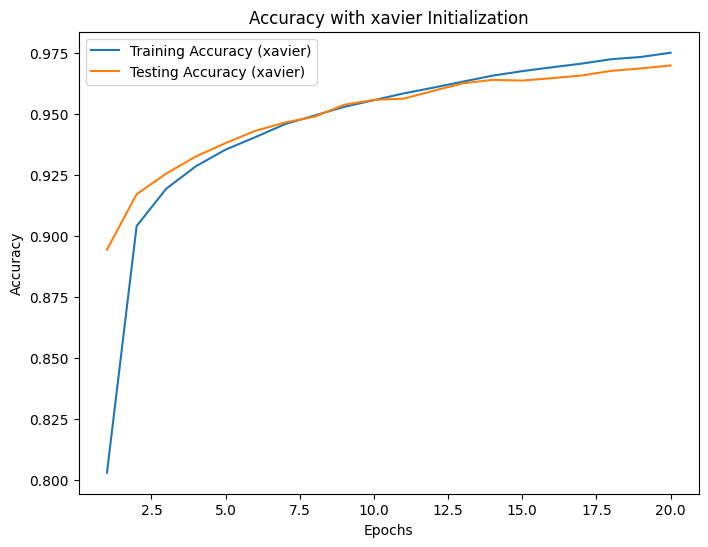

In [ ]:
# Experiment with weight initialization
def experiment_initialization(init_method):
    print(f"Using {init_method} initialization...")
    model = MLP()
    if init_method == "zeros":
        for param in model.parameters(): # Only for weights (not biases)
            if len(param.shape) > 1:
                nn.init.constant_(param, 0)
    elif init_method == "uniform":
        for param in model.parameters():
            if len(param.shape) > 1:
                nn.init.uniform_(param, 0, 1)
    elif init_method == "normal":
        for param in model.parameters():
            if len(param.shape) > 1:
                nn.init.normal_(param, 0, 1)
    elif init_method == "xavier":
        for param in model.parameters():
            if len(param.shape) > 1:
                nn.init.xavier_normal_(param)

    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    train_acc_list, test_acc_list = train_model(model, optimizer, criterion, train_loader, test_loader, epochs=20)

    # Result Plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 21), train_acc_list, label=f"Training Accuracy ({init_method})")
    plt.plot(range(1, 21), test_acc_list, label=f"Testing Accuracy ({init_method})")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy with {init_method} Initialization')
    plt.legend()
    plt.show()

# Weight Initialization Experiment
for init_method in ['zeros', 'uniform', 'normal', 'xavier']:
    experiment_initialization(init_method)

Using structure: {'hidden_size1': 100, 'hidden_size2': None}
Epoch [1/20], Training Accuracy: 0.7510, Testing Accuracy: 0.8666
Epoch [2/20], Training Accuracy: 0.8763, Testing Accuracy: 0.8932
Epoch [3/20], Training Accuracy: 0.8934, Testing Accuracy: 0.9022
Epoch [4/20], Training Accuracy: 0.9013, Testing Accuracy: 0.9086
Epoch [5/20], Training Accuracy: 0.9070, Testing Accuracy: 0.9153
Epoch [6/20], Training Accuracy: 0.9114, Testing Accuracy: 0.9185
Epoch [7/20], Training Accuracy: 0.9155, Testing Accuracy: 0.9217
Epoch [8/20], Training Accuracy: 0.9190, Testing Accuracy: 0.9243
Epoch [9/20], Training Accuracy: 0.9223, Testing Accuracy: 0.9264
Epoch [10/20], Training Accuracy: 0.9257, Testing Accuracy: 0.9291
Epoch [11/20], Training Accuracy: 0.9281, Testing Accuracy: 0.9322
Epoch [12/20], Training Accuracy: 0.9311, Testing Accuracy: 0.9341
Epoch [13/20], Training Accuracy: 0.9340, Testing Accuracy: 0.9346
Epoch [14/20], Training Accuracy: 0.9363, Testing Accuracy: 0.9378
Epoch [15/

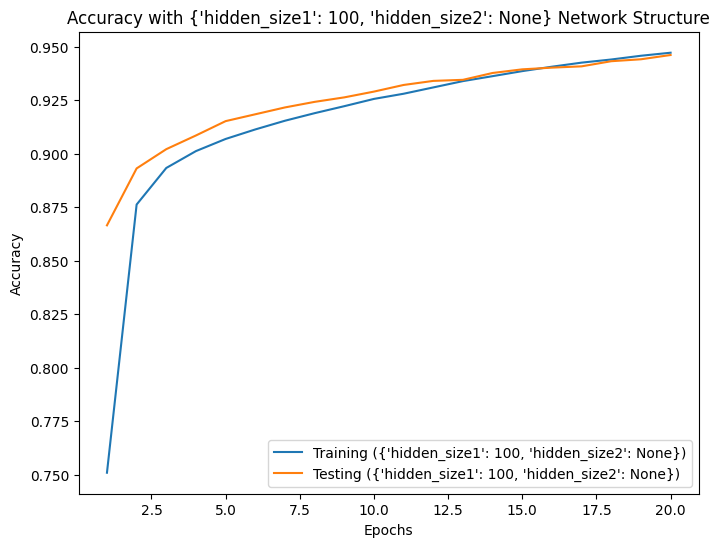

Using structure: {'hidden_size1': 400, 'hidden_size2': None}
Epoch [1/20], Training Accuracy: 0.7536, Testing Accuracy: 0.8681
Epoch [2/20], Training Accuracy: 0.8759, Testing Accuracy: 0.8941
Epoch [3/20], Training Accuracy: 0.8943, Testing Accuracy: 0.9039
Epoch [4/20], Training Accuracy: 0.9017, Testing Accuracy: 0.9105
Epoch [5/20], Training Accuracy: 0.9085, Testing Accuracy: 0.9160
Epoch [6/20], Training Accuracy: 0.9136, Testing Accuracy: 0.9197
Epoch [7/20], Training Accuracy: 0.9181, Testing Accuracy: 0.9224
Epoch [8/20], Training Accuracy: 0.9218, Testing Accuracy: 0.9270
Epoch [9/20], Training Accuracy: 0.9253, Testing Accuracy: 0.9299
Epoch [10/20], Training Accuracy: 0.9291, Testing Accuracy: 0.9315
Epoch [11/20], Training Accuracy: 0.9319, Testing Accuracy: 0.9352
Epoch [12/20], Training Accuracy: 0.9347, Testing Accuracy: 0.9371
Epoch [13/20], Training Accuracy: 0.9377, Testing Accuracy: 0.9375
Epoch [14/20], Training Accuracy: 0.9396, Testing Accuracy: 0.9404
Epoch [15/

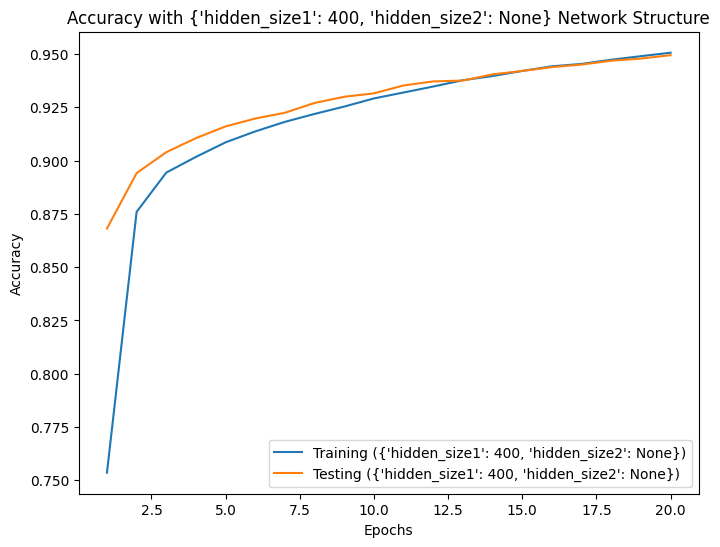

Using structure: {'hidden_size1': 100, 'hidden_size2': 100}
Epoch [1/20], Training Accuracy: 0.5707, Testing Accuracy: 0.8061
Epoch [2/20], Training Accuracy: 0.8524, Testing Accuracy: 0.8838
Epoch [3/20], Training Accuracy: 0.8901, Testing Accuracy: 0.9003
Epoch [4/20], Training Accuracy: 0.9024, Testing Accuracy: 0.9096
Epoch [5/20], Training Accuracy: 0.9106, Testing Accuracy: 0.9155
Epoch [6/20], Training Accuracy: 0.9168, Testing Accuracy: 0.9225
Epoch [7/20], Training Accuracy: 0.9214, Testing Accuracy: 0.9271
Epoch [8/20], Training Accuracy: 0.9266, Testing Accuracy: 0.9282
Epoch [9/20], Training Accuracy: 0.9306, Testing Accuracy: 0.9349
Epoch [10/20], Training Accuracy: 0.9349, Testing Accuracy: 0.9374
Epoch [11/20], Training Accuracy: 0.9380, Testing Accuracy: 0.9398
Epoch [12/20], Training Accuracy: 0.9410, Testing Accuracy: 0.9421
Epoch [13/20], Training Accuracy: 0.9444, Testing Accuracy: 0.9456
Epoch [14/20], Training Accuracy: 0.9469, Testing Accuracy: 0.9473
Epoch [15/2

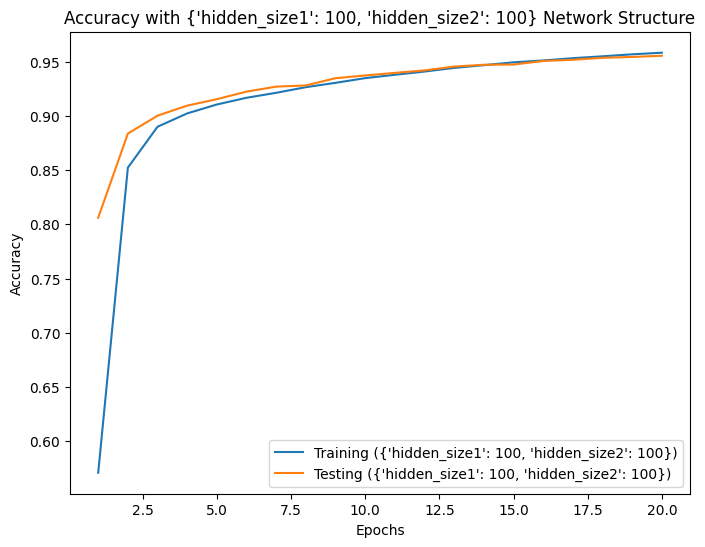

In [ ]:
# Experiment with different network structures
def experiment_network_structure():
    structures = [
        {"hidden_size1": 100, "hidden_size2": None},
        {"hidden_size1": 400, "hidden_size2": None},
        {"hidden_size1": 100, "hidden_size2": 100}
    ]

    for structure in structures:
        print(f"Using structure: {structure}")
        model = MLP(hidden_size1=structure["hidden_size1"], hidden_size2=structure["hidden_size2"])
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        criterion = nn.CrossEntropyLoss()

        train_acc_list, test_acc_list = train_model(model, optimizer, criterion, train_loader, test_loader, epochs=20)

        # Result Plot
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, 21), train_acc_list, label=f"Training ({structure})")
        plt.plot(range(1, 21), test_acc_list, label=f"Testing ({structure})")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy with {structure} Network Structure')
        plt.legend()
        plt.show()
# Network Structure Experiment
experiment_network_structure()


Using structure: {'hidden_size1': 100, 'hidden_size2': None}

Using SGD optimizer...
Epoch [1/20], Training Accuracy: 0.7195, Testing Accuracy: 0.8648
Epoch [2/20], Training Accuracy: 0.8737, Testing Accuracy: 0.8937
Epoch [3/20], Training Accuracy: 0.8914, Testing Accuracy: 0.9011
Epoch [4/20], Training Accuracy: 0.9007, Testing Accuracy: 0.9089
Epoch [5/20], Training Accuracy: 0.9064, Testing Accuracy: 0.9159
Epoch [6/20], Training Accuracy: 0.9113, Testing Accuracy: 0.9213
Epoch [7/20], Training Accuracy: 0.9151, Testing Accuracy: 0.9226
Epoch [8/20], Training Accuracy: 0.9194, Testing Accuracy: 0.9260
Epoch [9/20], Training Accuracy: 0.9221, Testing Accuracy: 0.9280
Epoch [10/20], Training Accuracy: 0.9254, Testing Accuracy: 0.9289
Epoch [11/20], Training Accuracy: 0.9290, Testing Accuracy: 0.9329
Epoch [12/20], Training Accuracy: 0.9314, Testing Accuracy: 0.9343
Epoch [13/20], Training Accuracy: 0.9336, Testing Accuracy: 0.9364
Epoch [14/20], Training Accuracy: 0.9357, Testing Ac

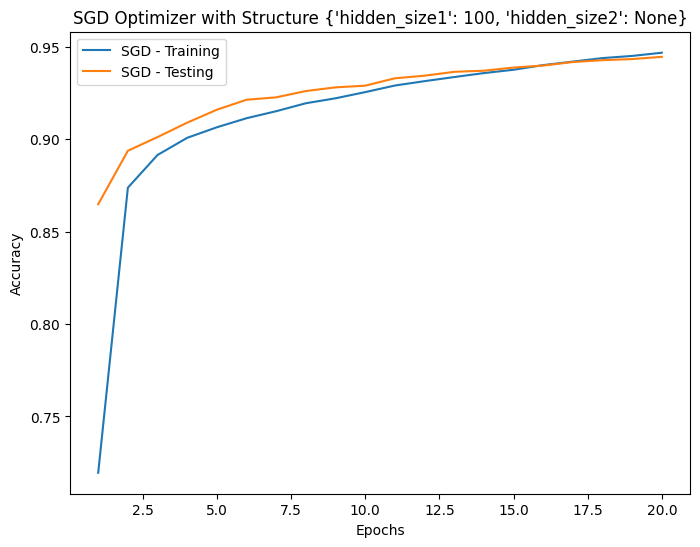

Using RMSProp optimizer...
Epoch [1/20], Training Accuracy: 0.9225, Testing Accuracy: 0.9591
Epoch [2/20], Training Accuracy: 0.9594, Testing Accuracy: 0.9411
Epoch [3/20], Training Accuracy: 0.9639, Testing Accuracy: 0.9583
Epoch [4/20], Training Accuracy: 0.9688, Testing Accuracy: 0.9571
Epoch [5/20], Training Accuracy: 0.9719, Testing Accuracy: 0.9657
Epoch [6/20], Training Accuracy: 0.9737, Testing Accuracy: 0.9657
Epoch [7/20], Training Accuracy: 0.9759, Testing Accuracy: 0.9675
Epoch [8/20], Training Accuracy: 0.9784, Testing Accuracy: 0.9649
Epoch [9/20], Training Accuracy: 0.9790, Testing Accuracy: 0.9662
Epoch [10/20], Training Accuracy: 0.9810, Testing Accuracy: 0.9665
Epoch [11/20], Training Accuracy: 0.9816, Testing Accuracy: 0.9623
Epoch [12/20], Training Accuracy: 0.9819, Testing Accuracy: 0.9624
Epoch [13/20], Training Accuracy: 0.9833, Testing Accuracy: 0.9659
Epoch [14/20], Training Accuracy: 0.9830, Testing Accuracy: 0.9615
Epoch [15/20], Training Accuracy: 0.9843, Te

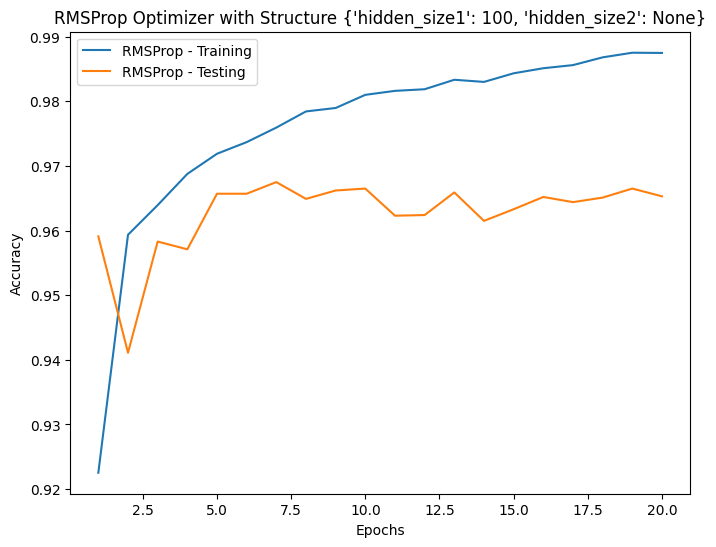

Using Adagrad optimizer...
Epoch [1/20], Training Accuracy: 0.9113, Testing Accuracy: 0.9337
Epoch [2/20], Training Accuracy: 0.9407, Testing Accuracy: 0.9441
Epoch [3/20], Training Accuracy: 0.9484, Testing Accuracy: 0.9504
Epoch [4/20], Training Accuracy: 0.9535, Testing Accuracy: 0.9540
Epoch [5/20], Training Accuracy: 0.9576, Testing Accuracy: 0.9570
Epoch [6/20], Training Accuracy: 0.9598, Testing Accuracy: 0.9582
Epoch [7/20], Training Accuracy: 0.9624, Testing Accuracy: 0.9604
Epoch [8/20], Training Accuracy: 0.9641, Testing Accuracy: 0.9614
Epoch [9/20], Training Accuracy: 0.9664, Testing Accuracy: 0.9626
Epoch [10/20], Training Accuracy: 0.9679, Testing Accuracy: 0.9643
Epoch [11/20], Training Accuracy: 0.9689, Testing Accuracy: 0.9650
Epoch [12/20], Training Accuracy: 0.9704, Testing Accuracy: 0.9657
Epoch [13/20], Training Accuracy: 0.9709, Testing Accuracy: 0.9660
Epoch [14/20], Training Accuracy: 0.9722, Testing Accuracy: 0.9671
Epoch [15/20], Training Accuracy: 0.9728, Te

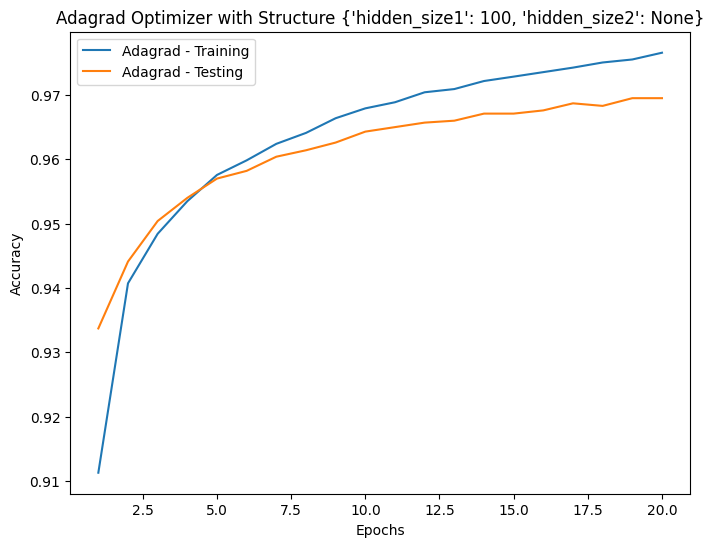

Using Adam optimizer...
Epoch [1/20], Training Accuracy: 0.9314, Testing Accuracy: 0.9584
Epoch [2/20], Training Accuracy: 0.9603, Testing Accuracy: 0.9653
Epoch [3/20], Training Accuracy: 0.9675, Testing Accuracy: 0.9621
Epoch [4/20], Training Accuracy: 0.9702, Testing Accuracy: 0.9671
Epoch [5/20], Training Accuracy: 0.9749, Testing Accuracy: 0.9641
Epoch [6/20], Training Accuracy: 0.9764, Testing Accuracy: 0.9656
Epoch [7/20], Training Accuracy: 0.9785, Testing Accuracy: 0.9679
Epoch [8/20], Training Accuracy: 0.9782, Testing Accuracy: 0.9693
Epoch [9/20], Training Accuracy: 0.9798, Testing Accuracy: 0.9668
Epoch [10/20], Training Accuracy: 0.9818, Testing Accuracy: 0.9652
Epoch [11/20], Training Accuracy: 0.9834, Testing Accuracy: 0.9635
Epoch [12/20], Training Accuracy: 0.9822, Testing Accuracy: 0.9678
Epoch [13/20], Training Accuracy: 0.9849, Testing Accuracy: 0.9680
Epoch [14/20], Training Accuracy: 0.9856, Testing Accuracy: 0.9695
Epoch [15/20], Training Accuracy: 0.9851, Testi

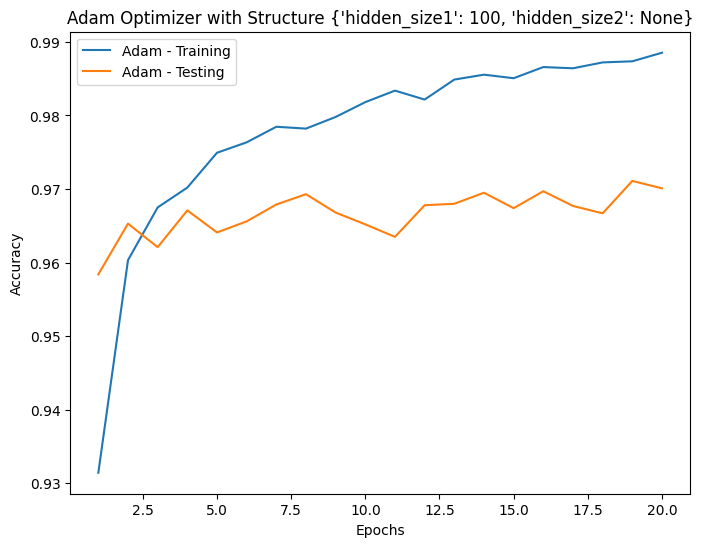


Using structure: {'hidden_size1': 400, 'hidden_size2': None}

Using SGD optimizer...
Epoch [1/20], Training Accuracy: 0.7669, Testing Accuracy: 0.8664
Epoch [2/20], Training Accuracy: 0.8765, Testing Accuracy: 0.8942
Epoch [3/20], Training Accuracy: 0.8939, Testing Accuracy: 0.9040
Epoch [4/20], Training Accuracy: 0.9023, Testing Accuracy: 0.9118
Epoch [5/20], Training Accuracy: 0.9083, Testing Accuracy: 0.9169
Epoch [6/20], Training Accuracy: 0.9140, Testing Accuracy: 0.9203
Epoch [7/20], Training Accuracy: 0.9180, Testing Accuracy: 0.9249
Epoch [8/20], Training Accuracy: 0.9222, Testing Accuracy: 0.9281
Epoch [9/20], Training Accuracy: 0.9257, Testing Accuracy: 0.9306
Epoch [10/20], Training Accuracy: 0.9290, Testing Accuracy: 0.9318
Epoch [11/20], Training Accuracy: 0.9316, Testing Accuracy: 0.9358
Epoch [12/20], Training Accuracy: 0.9349, Testing Accuracy: 0.9363
Epoch [13/20], Training Accuracy: 0.9372, Testing Accuracy: 0.9400
Epoch [14/20], Training Accuracy: 0.9398, Testing Ac

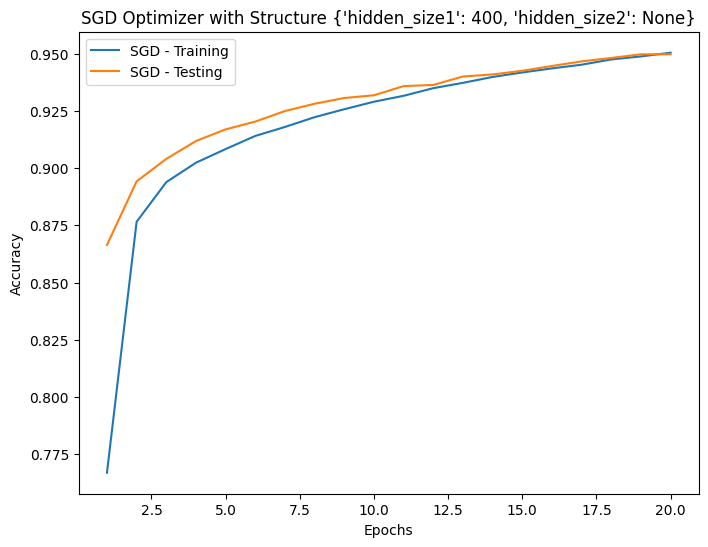

Using RMSProp optimizer...
Epoch [1/20], Training Accuracy: 0.9266, Testing Accuracy: 0.9334
Epoch [2/20], Training Accuracy: 0.9601, Testing Accuracy: 0.9600
Epoch [3/20], Training Accuracy: 0.9676, Testing Accuracy: 0.9633
Epoch [4/20], Training Accuracy: 0.9733, Testing Accuracy: 0.9637
Epoch [5/20], Training Accuracy: 0.9766, Testing Accuracy: 0.9618
Epoch [6/20], Training Accuracy: 0.9797, Testing Accuracy: 0.9684
Epoch [7/20], Training Accuracy: 0.9807, Testing Accuracy: 0.9690
Epoch [8/20], Training Accuracy: 0.9833, Testing Accuracy: 0.9711
Epoch [9/20], Training Accuracy: 0.9841, Testing Accuracy: 0.9700
Epoch [10/20], Training Accuracy: 0.9852, Testing Accuracy: 0.9691
Epoch [11/20], Training Accuracy: 0.9865, Testing Accuracy: 0.9708
Epoch [12/20], Training Accuracy: 0.9880, Testing Accuracy: 0.9718
Epoch [13/20], Training Accuracy: 0.9885, Testing Accuracy: 0.9714
Epoch [14/20], Training Accuracy: 0.9891, Testing Accuracy: 0.9701
Epoch [15/20], Training Accuracy: 0.9894, Te

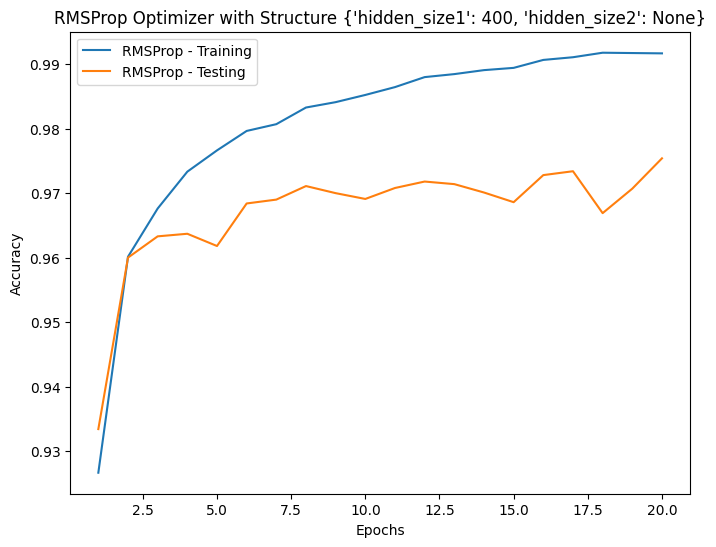

Using Adagrad optimizer...
Epoch [1/20], Training Accuracy: 0.9288, Testing Accuracy: 0.9562
Epoch [2/20], Training Accuracy: 0.9623, Testing Accuracy: 0.9652
Epoch [3/20], Training Accuracy: 0.9701, Testing Accuracy: 0.9702
Epoch [4/20], Training Accuracy: 0.9754, Testing Accuracy: 0.9729
Epoch [5/20], Training Accuracy: 0.9786, Testing Accuracy: 0.9731
Epoch [6/20], Training Accuracy: 0.9811, Testing Accuracy: 0.9747
Epoch [7/20], Training Accuracy: 0.9833, Testing Accuracy: 0.9759
Epoch [8/20], Training Accuracy: 0.9847, Testing Accuracy: 0.9770
Epoch [9/20], Training Accuracy: 0.9861, Testing Accuracy: 0.9776
Epoch [10/20], Training Accuracy: 0.9871, Testing Accuracy: 0.9782
Epoch [11/20], Training Accuracy: 0.9881, Testing Accuracy: 0.9790
Epoch [12/20], Training Accuracy: 0.9892, Testing Accuracy: 0.9790
Epoch [13/20], Training Accuracy: 0.9899, Testing Accuracy: 0.9791
Epoch [14/20], Training Accuracy: 0.9907, Testing Accuracy: 0.9796
Epoch [15/20], Training Accuracy: 0.9913, Te

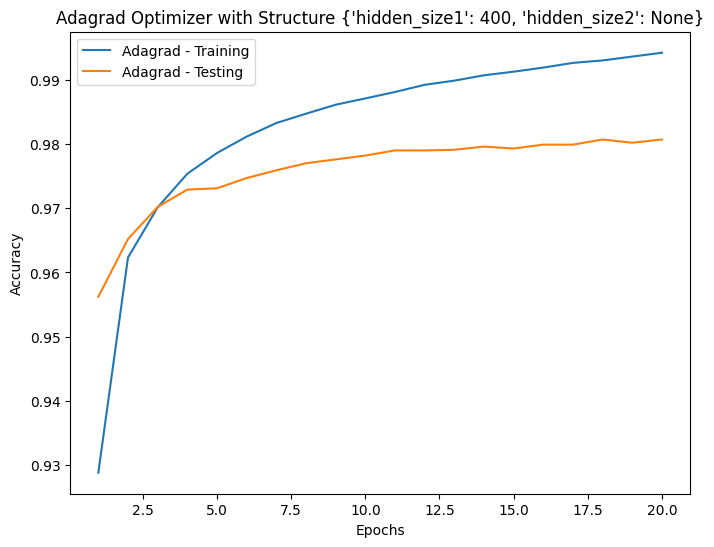

Using Adam optimizer...
Epoch [1/20], Training Accuracy: 0.9345, Testing Accuracy: 0.9610
Epoch [2/20], Training Accuracy: 0.9615, Testing Accuracy: 0.9597
Epoch [3/20], Training Accuracy: 0.9690, Testing Accuracy: 0.9588
Epoch [4/20], Training Accuracy: 0.9723, Testing Accuracy: 0.9644
Epoch [5/20], Training Accuracy: 0.9752, Testing Accuracy: 0.9669
Epoch [6/20], Training Accuracy: 0.9764, Testing Accuracy: 0.9643
Epoch [7/20], Training Accuracy: 0.9789, Testing Accuracy: 0.9698
Epoch [8/20], Training Accuracy: 0.9807, Testing Accuracy: 0.9668
Epoch [9/20], Training Accuracy: 0.9814, Testing Accuracy: 0.9579
Epoch [10/20], Training Accuracy: 0.9834, Testing Accuracy: 0.9682
Epoch [11/20], Training Accuracy: 0.9851, Testing Accuracy: 0.9681
Epoch [12/20], Training Accuracy: 0.9849, Testing Accuracy: 0.9692
Epoch [13/20], Training Accuracy: 0.9855, Testing Accuracy: 0.9681
Epoch [14/20], Training Accuracy: 0.9869, Testing Accuracy: 0.9687
Epoch [15/20], Training Accuracy: 0.9860, Testi

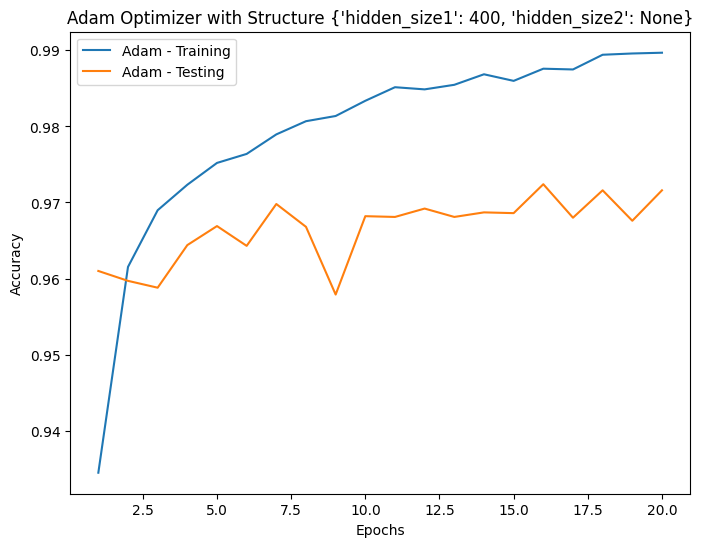


Using structure: {'hidden_size1': 100, 'hidden_size2': 100}

Using SGD optimizer...
Epoch [1/20], Training Accuracy: 0.5617, Testing Accuracy: 0.8240
Epoch [2/20], Training Accuracy: 0.8599, Testing Accuracy: 0.8885
Epoch [3/20], Training Accuracy: 0.8915, Testing Accuracy: 0.9022
Epoch [4/20], Training Accuracy: 0.9040, Testing Accuracy: 0.9105
Epoch [5/20], Training Accuracy: 0.9109, Testing Accuracy: 0.9181
Epoch [6/20], Training Accuracy: 0.9170, Testing Accuracy: 0.9222
Epoch [7/20], Training Accuracy: 0.9223, Testing Accuracy: 0.9261
Epoch [8/20], Training Accuracy: 0.9268, Testing Accuracy: 0.9311
Epoch [9/20], Training Accuracy: 0.9317, Testing Accuracy: 0.9344
Epoch [10/20], Training Accuracy: 0.9351, Testing Accuracy: 0.9370
Epoch [11/20], Training Accuracy: 0.9390, Testing Accuracy: 0.9391
Epoch [12/20], Training Accuracy: 0.9417, Testing Accuracy: 0.9415
Epoch [13/20], Training Accuracy: 0.9436, Testing Accuracy: 0.9455
Epoch [14/20], Training Accuracy: 0.9467, Testing Acc

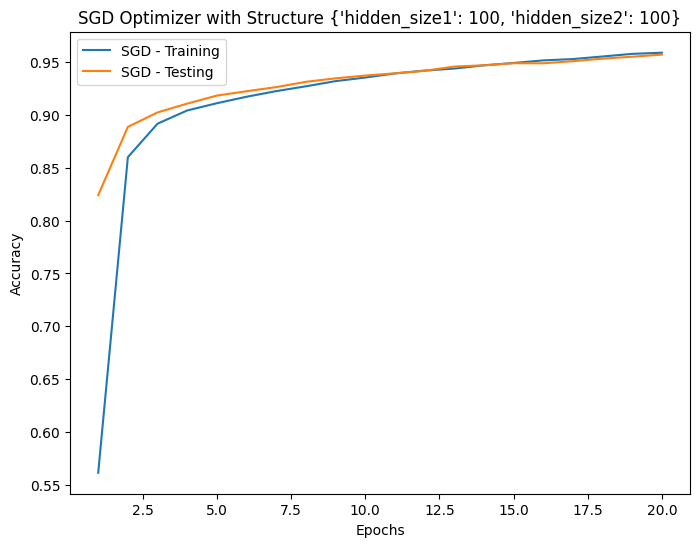

Using RMSProp optimizer...
Epoch [1/20], Training Accuracy: 0.8954, Testing Accuracy: 0.9342
Epoch [2/20], Training Accuracy: 0.9413, Testing Accuracy: 0.9426
Epoch [3/20], Training Accuracy: 0.9503, Testing Accuracy: 0.9428
Epoch [4/20], Training Accuracy: 0.9561, Testing Accuracy: 0.9478
Epoch [5/20], Training Accuracy: 0.9584, Testing Accuracy: 0.9539
Epoch [6/20], Training Accuracy: 0.9608, Testing Accuracy: 0.9518
Epoch [7/20], Training Accuracy: 0.9623, Testing Accuracy: 0.9566
Epoch [8/20], Training Accuracy: 0.9641, Testing Accuracy: 0.9561
Epoch [9/20], Training Accuracy: 0.9650, Testing Accuracy: 0.9586
Epoch [10/20], Training Accuracy: 0.9672, Testing Accuracy: 0.9343
Epoch [11/20], Training Accuracy: 0.9680, Testing Accuracy: 0.9462
Epoch [12/20], Training Accuracy: 0.9679, Testing Accuracy: 0.9583
Epoch [13/20], Training Accuracy: 0.9697, Testing Accuracy: 0.9568
Epoch [14/20], Training Accuracy: 0.9705, Testing Accuracy: 0.9573
Epoch [15/20], Training Accuracy: 0.9709, Te

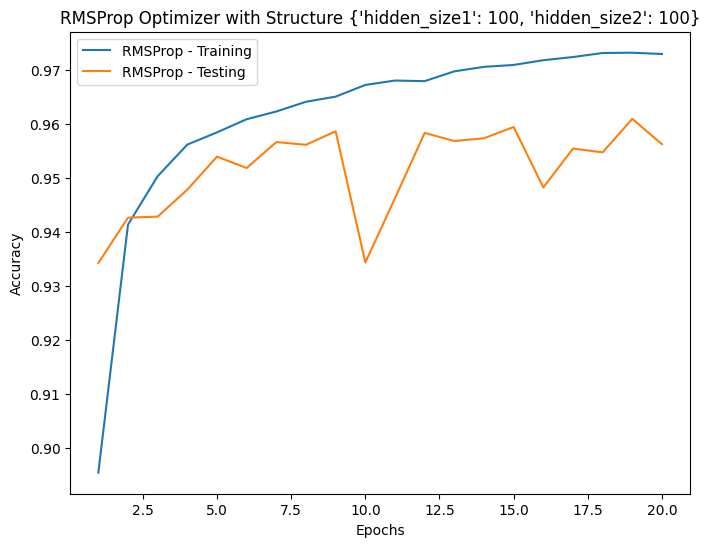

Using Adagrad optimizer...
Epoch [1/20], Training Accuracy: 0.9142, Testing Accuracy: 0.9447
Epoch [2/20], Training Accuracy: 0.9513, Testing Accuracy: 0.9552
Epoch [3/20], Training Accuracy: 0.9614, Testing Accuracy: 0.9614
Epoch [4/20], Training Accuracy: 0.9665, Testing Accuracy: 0.9636
Epoch [5/20], Training Accuracy: 0.9703, Testing Accuracy: 0.9658
Epoch [6/20], Training Accuracy: 0.9730, Testing Accuracy: 0.9673
Epoch [7/20], Training Accuracy: 0.9749, Testing Accuracy: 0.9693
Epoch [8/20], Training Accuracy: 0.9766, Testing Accuracy: 0.9706
Epoch [9/20], Training Accuracy: 0.9783, Testing Accuracy: 0.9709
Epoch [10/20], Training Accuracy: 0.9792, Testing Accuracy: 0.9710
Epoch [11/20], Training Accuracy: 0.9803, Testing Accuracy: 0.9719
Epoch [12/20], Training Accuracy: 0.9814, Testing Accuracy: 0.9718
Epoch [13/20], Training Accuracy: 0.9825, Testing Accuracy: 0.9735
Epoch [14/20], Training Accuracy: 0.9832, Testing Accuracy: 0.9734
Epoch [15/20], Training Accuracy: 0.9843, Te

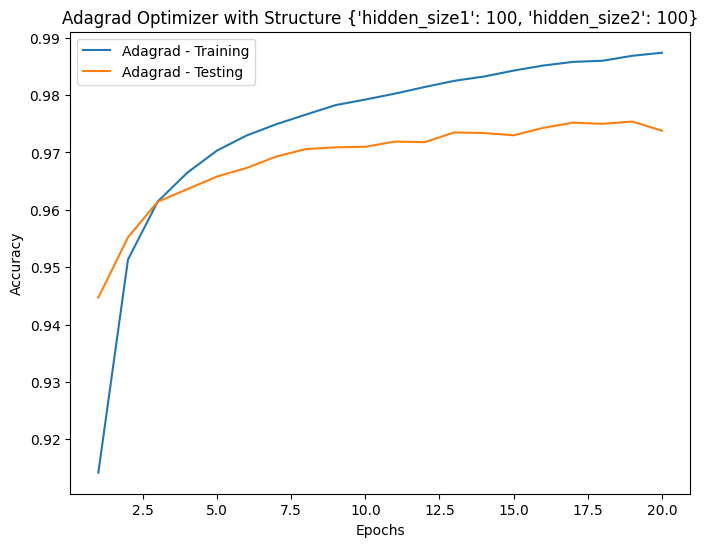

Using Adam optimizer...
Epoch [1/20], Training Accuracy: 0.9259, Testing Accuracy: 0.9543
Epoch [2/20], Training Accuracy: 0.9574, Testing Accuracy: 0.9563
Epoch [3/20], Training Accuracy: 0.9650, Testing Accuracy: 0.9593
Epoch [4/20], Training Accuracy: 0.9683, Testing Accuracy: 0.9680
Epoch [5/20], Training Accuracy: 0.9703, Testing Accuracy: 0.9674
Epoch [6/20], Training Accuracy: 0.9732, Testing Accuracy: 0.9688
Epoch [7/20], Training Accuracy: 0.9742, Testing Accuracy: 0.9641
Epoch [8/20], Training Accuracy: 0.9765, Testing Accuracy: 0.9605
Epoch [9/20], Training Accuracy: 0.9771, Testing Accuracy: 0.9714
Epoch [10/20], Training Accuracy: 0.9798, Testing Accuracy: 0.9711
Epoch [11/20], Training Accuracy: 0.9813, Testing Accuracy: 0.9670
Epoch [12/20], Training Accuracy: 0.9807, Testing Accuracy: 0.9674
Epoch [13/20], Training Accuracy: 0.9829, Testing Accuracy: 0.9667
Epoch [14/20], Training Accuracy: 0.9811, Testing Accuracy: 0.9673
Epoch [15/20], Training Accuracy: 0.9818, Testi

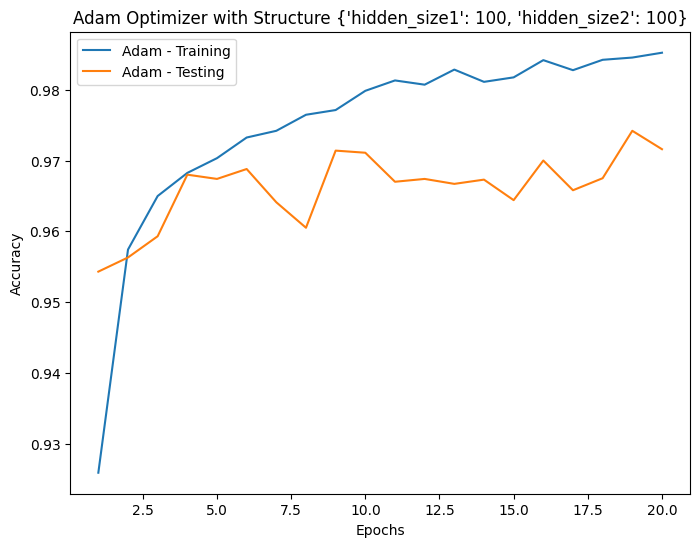

In [ ]:
# Experiment with different network structures and optimizers
def experiment_network_structure_and_optimizers():
    structures = [
        {"hidden_size1": 100, "hidden_size2": None},  # One hidden layer with 100 units
        {"hidden_size1": 400, "hidden_size2": None},  # One hidden layer with 400 units
        {"hidden_size1": 100, "hidden_size2": 100}   # Two hidden layers with 100 units each
    ]

    optimizers = {
        "SGD": optim.SGD,
        "RMSProp": optim.RMSprop,
        "Adagrad": optim.Adagrad,
        "Adam": optim.Adam
    }

    for structure in structures:
        print(f"\nUsing structure: {structure}\n")
        for opt_name, opt_fn in optimizers.items():
            print(f"Using {opt_name} optimizer...")
            model = MLP(hidden_size1=structure["hidden_size1"], hidden_size2=structure["hidden_size2"])
            optimizer = opt_fn(model.parameters(), lr=0.01)
            criterion = nn.CrossEntropyLoss()

            train_acc_list, test_acc_list = train_model(model, optimizer, criterion, train_loader, test_loader, epochs=20)

            # Plot results for this optimizer and structure
            plt.figure(figsize=(8, 6))
            plt.plot(range(1, 21), train_acc_list, label=f"{opt_name} - Training")
            plt.plot(range(1, 21), test_acc_list, label=f"{opt_name} - Testing")
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.title(f'{opt_name} Optimizer with Structure {structure}')
            plt.legend()
            plt.show()

# Run experiment
experiment_network_structure_and_optimizers()
